In [129]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configurations of the plots we will create

# Read our data

df = pd.read_csv(r"C:\Users\Johnson's Mac\Desktop\DataAnalystProjectPortfolio\Python\movies.csv")
                 


In [130]:
# look at the first few rows

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [131]:
# Checking for any missing data in original df

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))
    


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [132]:
# dropping NAs

df2 = pd.DataFrame.dropna(df)


In [133]:
# Checking again for any missing data in df2

for col in df2.columns:
    pct_missing = np.mean(df2[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [134]:
# checking data types for each column

df2.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [135]:
df2['budget'] = df2['budget'].astype('int64')
df2['gross'] = df2['gross'].astype('int64')

C:\Users\JOHNSO~1\AppData\Local\Temp/ipykernel_10960/2432112358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['budget'] = df2['budget'].astype('int64')
C:\Users\JOHNSO~1\AppData\Local\Temp/ipykernel_10960/2432112358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['gross'] = df2['gross'].astype('int64')


In [136]:
# check 'budget' and 'gross' type

print(df2['budget'].dtypes)
print(df2['gross'].dtypes)

int64
int64


In [137]:
# Extract year from 'released' and create new column

release_year = []                   # create new list
for string in df2['released']:      # using for loop to split up date and country
    date = string.split(' (')[0]
    
    for year in date:               # 
        year = date[-4:]
    
    release_year.append(year)
    
df2['release_year'] = release_year
df2

C:\Users\JOHNSO~1\AppData\Local\Temp/ipykernel_10960/495482770.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['release_year'] = release_year


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


In [138]:
# sort data in descending order based on Gross

df = df2.sort_values(by = [ 'gross'], ascending=False)

In [139]:
# change view options to see all data

# pd.set_option('display.max_rows', None)    # setting option to see all rows
pd.reset_option('display')             # setting it back

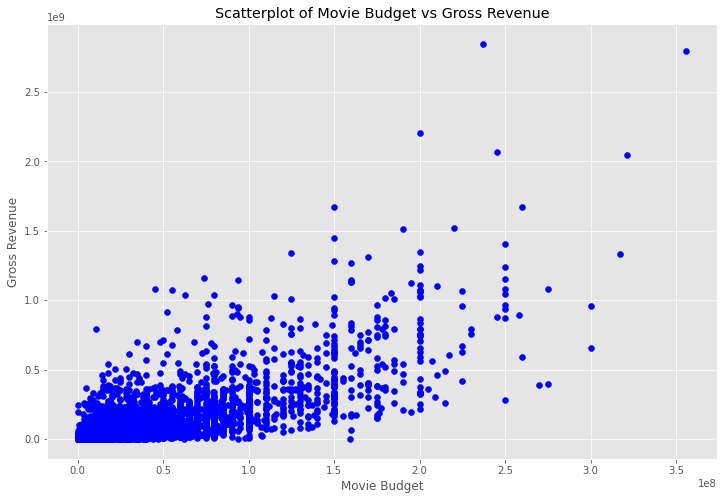

In [140]:
# Scatterplot with budget vs gross

plt.scatter(x=df['budget'], y = df['gross'], color = 'blue')
plt.title('Scatterplot of Movie Budget vs Gross Revenue')
plt.xlabel('Movie Budget')
plt.ylabel('Gross Revenue')
plt.show()

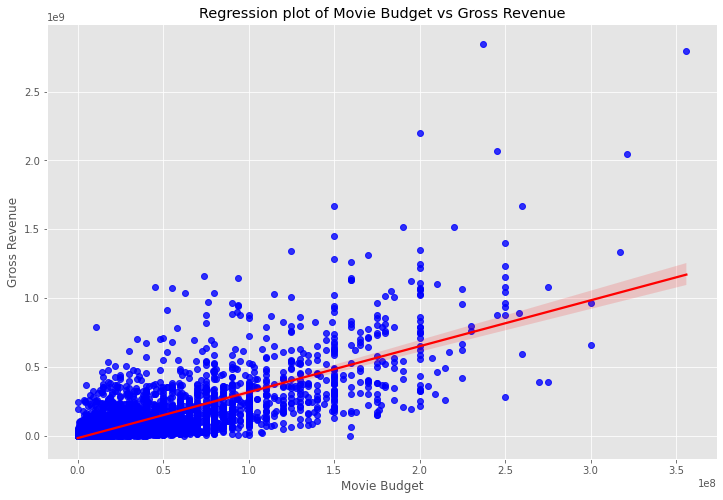

In [141]:
# Regression plot with Seaborn

sns.regplot(x='budget',y='gross',data=df2, scatter_kws={'color':'blue'}, line_kws = {'color':'red'})
plt.title('Regression plot of Movie Budget vs Gross Revenue')
plt.xlabel('Movie Budget')
plt.ylabel('Gross Revenue')
plt.show()

In [142]:
# Correlation

df.corr()       # only works with numeric fields

# We can see here that gross vs budget has the highest correlation: 0.74

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


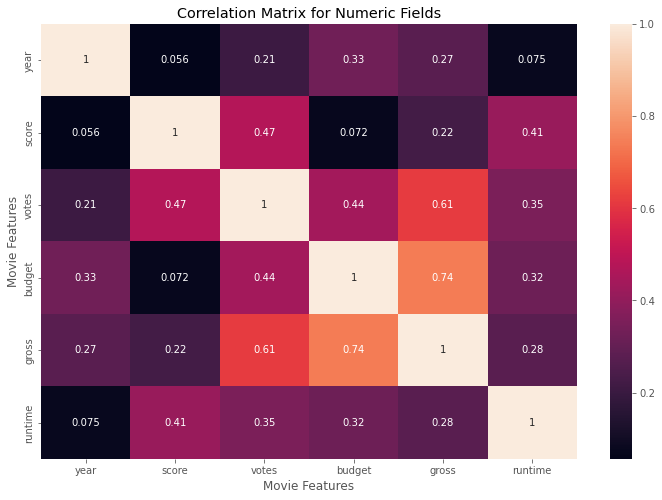

In [143]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Fields')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [144]:
# numerizing Objects into numeric with For loop

df_numerized = df

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtypes == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_year
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,29
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,39
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,17
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,35
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,6,6,2009,890,5.8,3500.0,585,2924,1498,47,3000000,5073,1385,96.0,35
2434,2969,5,0,1993,1467,4.5,1900.0,1805,3102,186,47,5000000,2970,1376,97.0,14
3681,1595,3,6,2000,1721,6.8,43000.0,952,1683,527,6,5000000,2554,466,108.0,21
272,2909,6,9,1982,1525,3.9,2300.0,261,55,1473,47,800000,2270,582,85.0,2


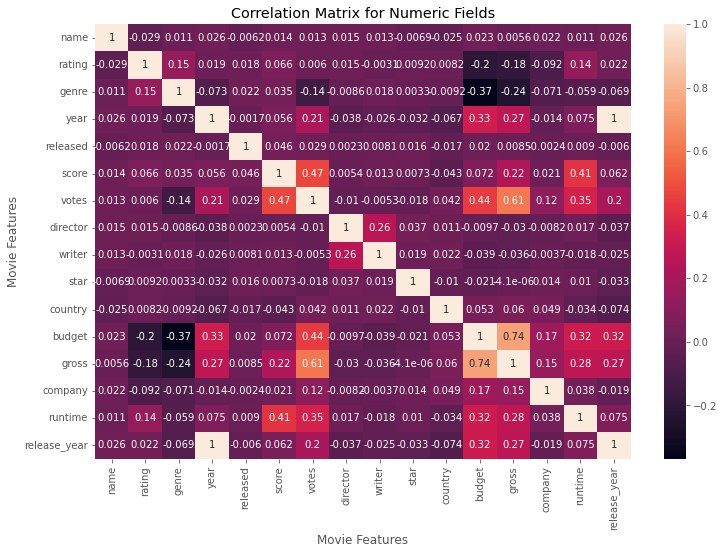

In [145]:
correlation_matrix2 = df_numerized.corr()

sns.heatmap(correlation_matrix2, annot=True)
plt.title('Correlation Matrix for Numeric Fields')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [146]:
correlation_matrix2 = df_numerized.corr()

corr_pairs = correlation_matrix2.unstack()

corr_pairs['gross'].sort_values(ascending = False)

gross           1.000000
budget          0.740247
votes           0.614751
runtime         0.275796
year            0.274321
release_year    0.268721
score           0.222556
company         0.149553
country         0.060078
released        0.008501
name            0.005639
star           -0.000004
director       -0.029560
writer         -0.035885
rating         -0.181906
genre          -0.244101
dtype: float64

In [147]:
sort_pairs = corr_pairs.sort_values()

high_correlation = sort_pairs[sort_pairs > 0.5]

high_correlation.sort_values(ascending=False)

# Both Budget and Votes have the high correlation in relations to Gross

star          star            1.000000
writer        writer          1.000000
runtime       runtime         1.000000
rating        rating          1.000000
genre         genre           1.000000
year          year            1.000000
released      released        1.000000
score         score           1.000000
votes         votes           1.000000
director      director        1.000000
release_year  release_year    1.000000
country       country         1.000000
budget        budget          1.000000
gross         gross           1.000000
company       company         1.000000
name          name            1.000000
release_year  year            0.998726
year          release_year    0.998726
budget        gross           0.740247
gross         budget          0.740247
votes         gross           0.614751
gross         votes           0.614751
dtype: float64